In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:

file_path = r'C:\\Users\\sumat\\Desktop\\GSI Suman\\Green Apple -By Suman\\09_07_24\Green Bottom 1\\GB_moc_resamp.sig'

# Read the file as binary and decode to int
with open(file_path, 'rb') as file:
    sig_data = file.read()

sig_text_data = sig_data.decode('utf-8')

In [11]:
# Split the data into lines to identify the header and data sections
lines = sig_text_data.splitlines()

# Extract the lines where the actual data begins
data_lines = []
header_ended = False

for line in lines:
    if header_ended:
        data_lines.append(line.strip())
    if "data=" in line:
        header_ended = True

In [18]:
print("Number of data lines found:", len(data_lines))

Number of data lines found: 217


In [19]:
# Convert the data lines to a numpy array for easier manipulation
try:
    data_array_new = np.array([list(map(float, line.split())) for line in data_lines])
    print("Data array shape:", data_array_new.shape)
except ValueError as e:
    print("Error parsing data lines:", e)



Data array shape: (217, 4)


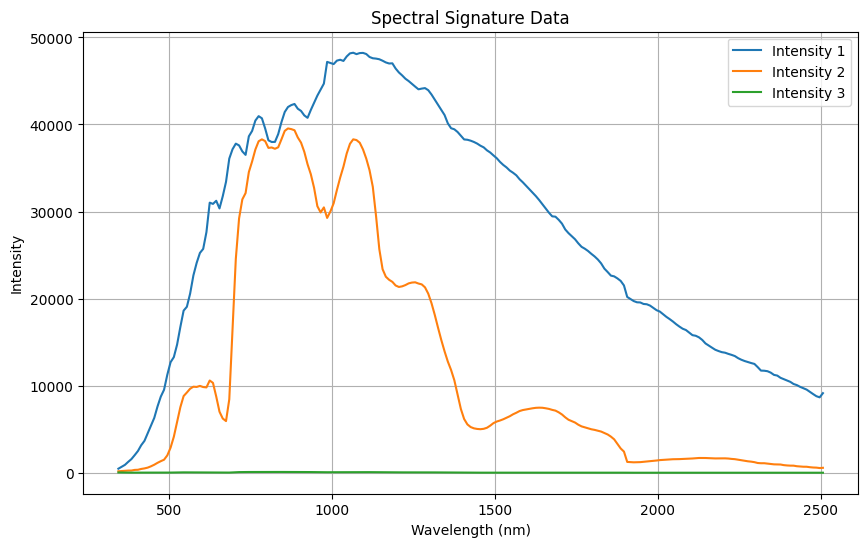

In [20]:
# Ensure the data array has the correct shape
if data_array_new.shape[1] > 1:
    wavelengths = data_array_new[:, 0]
    intensities = data_array_new[:, 1:]
    # Plot the spectral data
    plt.figure(figsize=(10, 6))
    for i in range(intensities.shape[1]):
        plt.plot(wavelengths, intensities[:, i], label=f'Intensity {i+1}')

    plt.title('Spectral Signature Data')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Error: Data array does not have multiple columns.")